# Thống kê kết quả trên model XGBoost
## Nhóm 17

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [6]:
folder_path = "../XGBoost/"

In [9]:
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

In [14]:
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

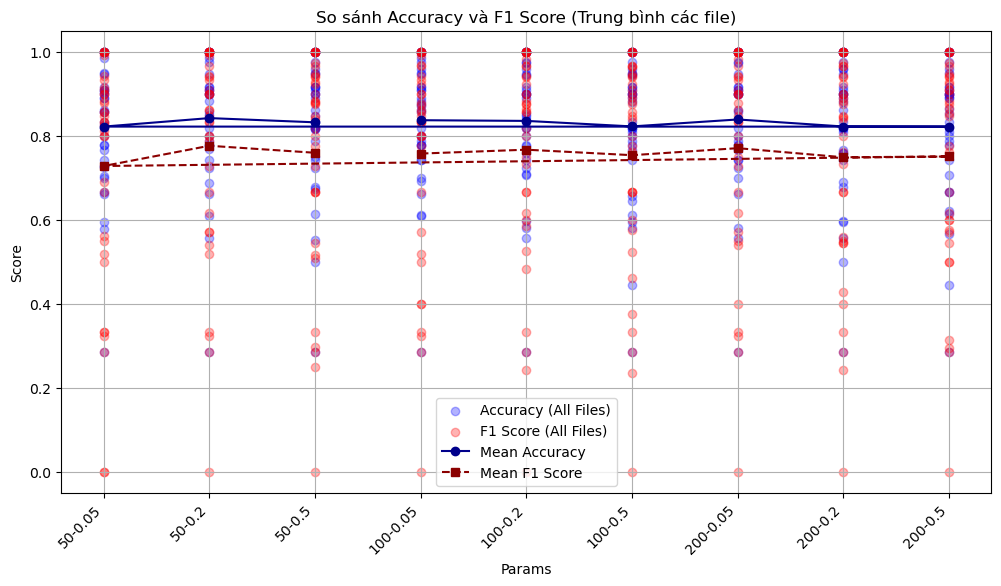

Best Accuracy:
params        50-0.2
accuracy    0.841737
f1_score    0.775842
Name: 7, dtype: object
Best F1 Score:
params        50-0.2
accuracy    0.841737
f1_score    0.775842
Name: 7, dtype: object


In [18]:
if dataframes:
    data = pd.concat(dataframes, ignore_index=True)

    # Tính trung bình accuracy và f1_score theo params
    mean_data = data.groupby("params", as_index=False).mean()

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))

    # Vẽ các điểm dữ liệu từ tất cả các tệp
    plt.scatter(data["params"], data["accuracy"], alpha=0.3, label="Accuracy (All Files)", color="blue")
    plt.scatter(data["params"], data["f1_score"], alpha=0.3, label="F1 Score (All Files)", color="red")

    # Vẽ đường trung bình
    plt.plot(mean_data["params"], mean_data["accuracy"], marker="o", linestyle="-", label="Mean Accuracy", color="darkblue")
    plt.plot(mean_data["params"], mean_data["f1_score"], marker="s", linestyle="--", label="Mean F1 Score", color="darkred")

    # Cấu hình biểu đồ
    plt.xlabel("Params")
    plt.ylabel("Score")
    plt.title("So sánh Accuracy và F1 Score (Trung bình các file)")
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.grid()
    
    plt.show()

    # Tìm params có accuracy cao nhất
    best_acc_param = mean_data.loc[mean_data["accuracy"].idxmax()]
    print("Best Accuracy:")
    print(best_acc_param)

    # Tìm params có f1_score cao nhất
    best_f1_param = mean_data.loc[mean_data["f1_score"].idxmax()]
    print("Best F1 Score:")
    print(best_f1_param)
